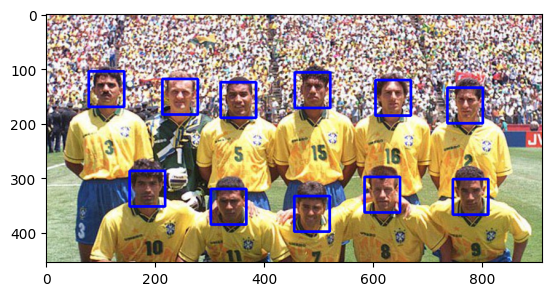

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

imagem = cv2.imread('./img/Selecao.jpeg')
imagemGray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

face_frontal = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

face_recon = face_frontal.detectMultiScale(imagemGray, scaleFactor = 2.7, minNeighbors = 2, minSize = (50, 50))

for (x, y, w, h) in face_recon:
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
import mediapipe as mp

cam = cv2.Videoapture(0)
ReconhecimentoFacial = mp.solutions.face_detection
Reconhecedor = ReconhecimentoFacial.FaceDetection()
Draw = mp.solutions.drawing_utils

while True:
    status, image = cam.read()
    if not status:
        break

    faces = Reconhecedor.process(image)

    if faces.detections:
            for rosto in faces.detections:
                Draw.draw_detection(image, rosto)

    cv2.imshow("Faces no Webcam", image)

    if cv2.waitKey(5) == 27:
         break
    
cam.realease()
cv2.destroyAllWindows()